<a href="https://colab.research.google.com/github/montaser00/data_mining_frequent_items/blob/main/Data_Minning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import matplotlib as matplot
import matplotlib.pyplot as plot

# Reading data with 'ISO-8859-1' encoding with ignoring bad formatted records.
data = pd.read_csv(open("data.csv", "r", encoding='ISO-8859-1'), error_bad_lines=False)

# Display the structure of the csv file with 3 samples
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-28-b21cabaa4d60>:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(open("data.csv", "r", encoding='ISO-8859-1'), error_bad_lines=False)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [109]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,425165.000000,425165.000000,318653.000000
mean,9.841671,4.709499,15276.288587
std,170.266954,101.653624,1714.015826
min,-74215.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13895.000000
50%,3.000000,2.100000,15144.000000
75%,12.000000,4.130000,16776.000000
max,74215.000000,38970.000000,18287.000000


In [29]:
data.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(425166, 8)

In [111]:
# Showing Number Of Products Sold Per Country
print(data['Country'].value_counts())

United Kingdom          386814
Germany                   7964
EIRE                      6705
France                    6595
Netherlands               2059
Spain                     2033
Switzerland               1776
Belgium                   1676
Portugal                  1272
Australia                 1214
Norway                     830
Channel Islands            677
Finland                    595
Italy                      572
Cyprus                     518
Unspecified                393
Sweden                     364
Austria                    324
Japan                      318
Israel                     297
Denmark                    295
Hong Kong                  286
Poland                     267
USA                        248
Singapore                  229
Canada                     151
Iceland                    124
Greece                     110
Malta                      104
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [30]:
# Print list
def print_list(groupBy):
  count = 1
  end = ', '
  for country in list(groupBy.groups.keys()):
    if count % 10 == 0:
      end= '\n'
    else:
      end = ', '
    count += 1
    print(country, end=end)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
# Exploring the Data Samples
# Countries List
print('Countries List')
print_list(data.groupby(by='Country'))
print("\n")

Countries List
Australia, Austria, Bahrain, Belgium, Brazil, Canada, Channel Islands, Cyprus, Czech Republic, Denmark
EIRE, European Community, Finland, France, Germany, Greece, Hong Kong, Iceland, Israel, Italy
Japan, Lebanon, Lithuania, Malta, Netherlands, Norway, Poland, Portugal, RSA, Saudi Arabia
Singapore, Spain, Sweden, Switzerland, USA, United Arab Emirates, United Kingdom, Unspecified, 



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
# Quantities
print('Quantities')
print_list(data.groupby(by='Quantity'))
print('\n')

Quantities
-74215.0, -9600.0, -9360.0, -9058.0, -5368.0, -3667.0, -3167.0, -3114.0, -3100.0, -3000.0
-2880.0, -2834.0, -2600.0, -2472.0, -2376.0, -2000.0, -1930.0, -1897.0, -1681.0, -1515.0
-1512.0, -1479.0, -1440.0, -1430.0, -1400.0, -1350.0, -1300.0, -1296.0, -1277.0, -1206.0
-1200.0, -1121.0, -1100.0, -1092.0, -1060.0, -1000.0, -990.0, -975.0, -967.0, -960.0
-939.0, -840.0, -828.0, -800.0, -786.0, -756.0, -752.0, -750.0, -741.0, -723.0
-720.0, -701.0, -690.0, -682.0, -675.0, -670.0, -664.0, -635.0, -624.0, -620.0
-618.0, -600.0, -590.0, -576.0, -553.0, -541.0, -530.0, -524.0, -500.0, -484.0
-480.0, -472.0, -468.0, -458.0, -455.0, -450.0, -443.0, -434.0, -432.0, -430.0
-420.0, -413.0, -408.0, -400.0, -391.0, -390.0, -384.0, -380.0, -365.0, -360.0
-346.0, -345.0, -343.0, -342.0, -335.0, -334.0, -324.0, -323.0, -320.0, -318.0
-312.0, -310.0, -306.0, -304.0, -300.0, -290.0, -288.0, -278.0, -275.0, -272.0
-271.0, -270.0, -259.0, -252.0, -251.0, -250.0, -242.0, -240.0, -234.0, -232.0
-231

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
#Prices
print('Prices', end='\n')
print_list(data.groupby(by='UnitPrice'))
print('\n')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Prices
-11062.06, 0.0, 0.001, 0.01, 0.03, 0.04, 0.06, 0.07, 0.08, 0.1
0.11, 0.12, 0.14, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22
0.24, 0.25, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.34, 0.35
0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.45, 0.48
0.5, 0.53, 0.55, 0.58, 0.59, 0.61, 0.62, 0.63, 0.64, 0.65
0.66, 0.67, 0.68, 0.69, 0.7, 0.72, 0.73, 0.74, 0.75, 0.76
0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86
0.87, 0.9, 0.91, 0.94, 0.95, 0.97, 0.98, 0.99, 1.0, 1.01
1.02, 1.04, 1.05, 1.06, 1.08, 1.1, 1.12, 1.18, 1.21, 1.23
1.24, 1.25, 1.26, 1.27, 1.28, 1.31, 1.32, 1.35, 1.36, 1.38
1.4, 1.42, 1.43, 1.45, 1.46, 1.48, 1.49, 1.5, 1.53, 1.55
1.6, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7, 1.72
1.74, 1.75, 1.76, 1.79, 1.8, 1.84, 1.85, 1.87, 1.88, 1.89
1.9, 1.91, 1.92, 1.93, 1.95, 1.96, 1.97, 1.98, 2.0, 2.02
2.06, 2.07, 2.08, 2.09, 2.1, 2.11, 2.12, 2.13, 2.16, 2.17
2.21, 2.22, 2.25, 2.26, 2.29, 2.3, 2.31, 2.32, 2.33, 2.35
2.39, 2.4, 2.41, 2.45, 2.46, 2.48, 2.49, 2.5, 2.51, 2.54
2.55, 

In [34]:
# StockCode
print('StockCodes', end='\n')
print_list(data.groupby(by='StockCode'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


StockCodes
10002, 10080, 10120, 10123C, 10123G, 10124A, 10124G, 10125, 10133, 10134
10135, 11001, 15030, 15034, 15036, 15039, 15044A, 15044B, 15044C, 15044D
15056BL, 15056N, 15056P, 15056bl, 15056n, 15056p, 15058A, 15058B, 15058C, 15060B
15060b, 16008, 16010, 16011, 16012, 16014, 16015, 16016, 16020C, 16033
16043, 16045, 16046, 16048, 16049, 16052, 16053, 16054, 16151A, 16156L
16156S, 16161G, 16161M, 16161P, 16161U, 16162L, 16162M, 16168M, 16169E, 16169K
16169M, 16169N, 16169P, 16202A, 16202B, 16202E, 16206B, 16207A, 16207B, 16216
16218, 16219, 16225, 16235, 16236, 16237, 16238, 16244B, 16248B, 16254
16258A, 16259, 17001, 17003, 17007B, 17011A, 17011F, 17012A, 17012B, 17012C
17012D, 17012E, 17012F, 17013D, 17014A, 17021, 17028J, 17038, 17084A, 17084J
17084N, 17084P, 17084R, 17090A, 17090D, 17091A, 17091J, 17096, 17107D, 17109D
17129F, 17136A, 17164B, 17165D, 17174, 18007, 18094C, 18097A, 18097C, 18098C
18098c, 20615, 20616, 20617, 20618, 20619, 20622, 20652, 20653, 20654
20655, 20657, 

In [35]:
data.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


InvoiceNo           0
StockCode           1
Description      1362
Quantity            1
InvoiceDate         1
UnitPrice           1
CustomerID     106513
Country             1
dtype: int64

In [37]:
def clean_data(data):
  # Removing Unspecified Country
  data = data[data['Country'] != 'Unspecified']

  # Removing Quantity in Munius
  data = data[data['Quantity'] > 0]

  # Drop Products With No Description
  data = data[data["Description"] != None]

  # Cleaning Data
  data.loc[data['Country'] == 'Israel'] = 'Palestine'

  # Remove Data With Invalid Stock Code
  regex = r"[0-9]+[A-Za-z]*[0-9]*"
  data = data[data["StockCode"].str.match(regex)]

  return data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
data = clean_data(data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
print('StockCodes', end='\n')
print_list(data.groupby(by='StockCode'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


StockCodes
10002, 10080, 10120, 10123C, 10124A, 10124G, 10125, 10133, 10135, 11001
15030, 15034, 15036, 15039, 15044A, 15044B, 15044C, 15044D, 15056BL, 15056N
15056P, 15056bl, 15056n, 15056p, 15058A, 15058B, 15058C, 15060B, 15060b, 16008
16010, 16011, 16012, 16014, 16015, 16016, 16020C, 16033, 16043, 16045
16046, 16048, 16049, 16052, 16054, 16151A, 16156L, 16156S, 16161G, 16161M
16161P, 16161U, 16162L, 16162M, 16168M, 16169E, 16169K, 16169M, 16169N, 16169P
16202A, 16202B, 16202E, 16206B, 16207A, 16207B, 16216, 16218, 16219, 16225
16235, 16236, 16237, 16238, 16244B, 16248B, 16254, 16258A, 16259, 17001
17003, 17007B, 17011F, 17012A, 17012B, 17012C, 17012D, 17012E, 17012F, 17013D
17014A, 17021, 17028J, 17038, 17084A, 17084J, 17084N, 17084P, 17084R, 17090A
17090D, 17091A, 17091J, 17096, 17107D, 17109D, 17129F, 17136A, 17164B, 17165D
17174, 18007, 18094C, 18097A, 18097C, 18098C, 18098c, 20615, 20616, 20617
20618, 20619, 20622, 20652, 20653, 20654, 20655, 20657, 20658, 20659
20661, 20662, 20

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


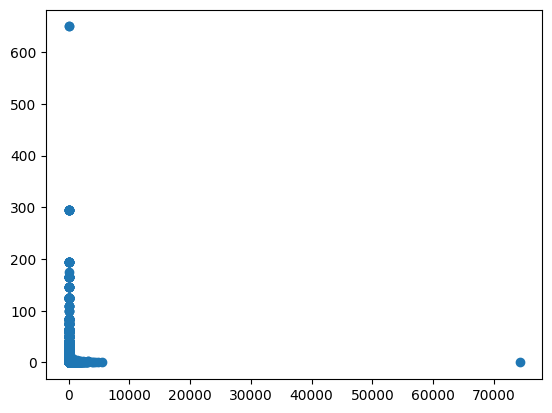

In [40]:
# Visualizing Quantity and UnitPrice
x = data['Quantity']
y = data['UnitPrice']
plot.scatter(x, y)

In [44]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

basket = (data.groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
basket

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,on cargo order,rcvd be air temp fix for dotcom sit,returned,taig adjust,test,website fixed,wrongly coded 20713,wrongly coded 23343,wrongly marked 23343,wrongly sold (22719) barcode
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
573295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
573300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# Encoding The Invoices, Appearance of Item In Quantity > 0 is 1
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
# Finding Frequent Item Set
frequent_itemsets = apriori(basket.applymap(encode_units), min_support=0.035, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [51]:
# Finding The Association Rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
# Displaying Rules
rules = rules.drop(columns=['leverage', 'zhangs_metric', 'conviction'])
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
0,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.057433,0.054518,0.041307,0.719222,13.192291
1,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.054518,0.057433,0.041307,0.757679,13.192291
2,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.066241,0.109905,0.044967,0.678839,6.176592
3,(JUMBO SHOPPER VINTAGE RED PAISLEY),(JUMBO BAG RED RETROSPOT),0.061279,0.109905,0.035911,0.586032,5.332167
4,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.063326,0.109905,0.038454,0.607248,5.525201
